In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.metrics import mean_absolute_percentage_error


In [4]:
df = pd.read_csv('exercise_data.csv')
df.head(5)

,distance,rhr,zone mins
0,4.69,69,0
1,3.26,69,7
2,9.05,69,59
3,7.88,65,80
4,10.00,63,67


In [5]:
df.isnull().sum()

distance     0
rhr          0
zone mins    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   distance   150 non-null    float64
 1   rhr        150 non-null    int64  
 2   zone mins  150 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.6 KB


In [7]:
df.describe()

,distance,rhr,zone mins
count,150.000000,150.000000,150.000000
mean,10.354733,61.146667,69.073333
std,4.300465,2.852967,60.331533
min,1.950000,55.000000,0.000000
25%,7.422500,59.000000,13.250000
50%,10.095000,61.000000,59.000000
75%,13.485000,63.000000,108.750000
max,26.310000,69.000000,276.000000


In [8]:
df.shape

(150, 3)

In [9]:
df.columns

Index(['distance', 'rhr', 'zone mins'], dtype='object')

In [12]:
df.nunique()

distance     144
rhr           14
zone mins    102
dtype: int64

In [13]:
df

,distance,rhr,zone mins
0,4.69,69,0
1,3.26,69,7
2,9.05,69,59
3,7.88,65,80
4,10.00,63,67
...,...,...,...
145,7.90,57,3
146,7.66,60,35
147,9.12,60,33
148,5.56,59,64


In [33]:
df.corr()

,distance,rhr,zone mins,day,Predicted rhr
distance,1.000000,-0.400627,0.783972,0.308377,-0.308377
rhr,-0.400627,1.000000,-0.213426,-0.784534,0.784534
zone mins,0.783972,-0.213426,1.000000,0.124001,-0.124001
day,0.308377,-0.784534,0.124001,1.000000,-1.000000
Predicted rhr,-0.308377,0.784534,-0.124001,-1.000000,1.000000


<Axes: >

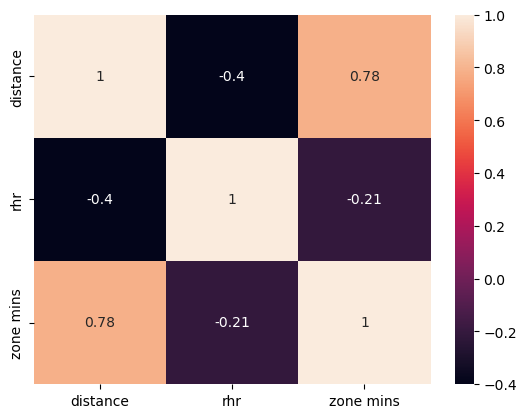

In [15]:
sns.heatmap(df.corr(),annot=True)

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

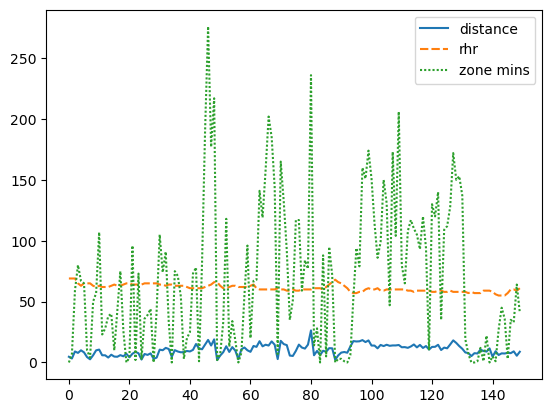

In [16]:
sns.lineplot(df)

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


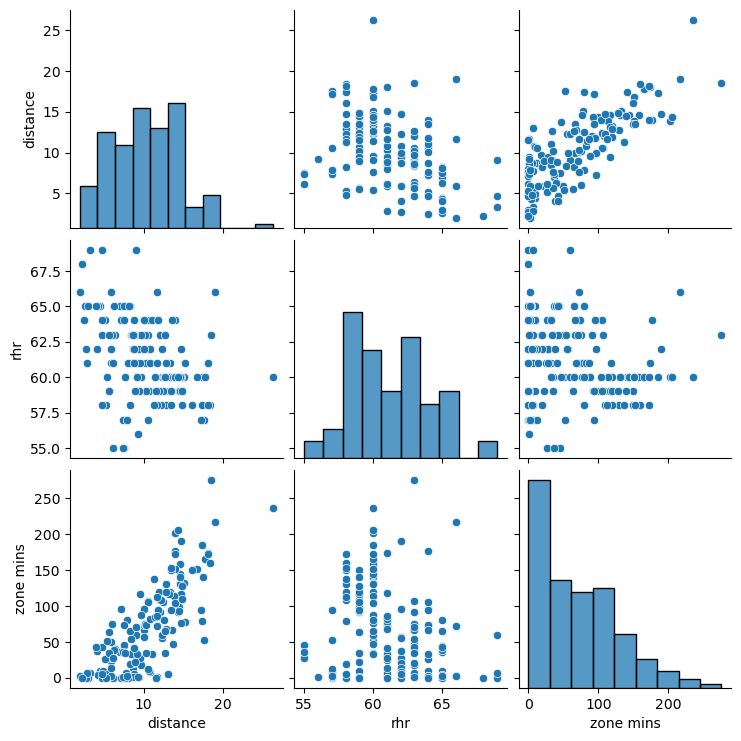

In [17]:
sns.pairplot(df)

In [20]:
df['day'] = df.index + 1


In [21]:
df

,distance,rhr,zone mins,day
0,4.69,69,0,1
1,3.26,69,7,2
2,9.05,69,59,3
3,7.88,65,80,4
4,10.00,63,67,5
...,...,...,...,...
145,7.90,57,3,146
146,7.66,60,35,147
147,9.12,60,33,148
148,5.56,59,64,149


<Axes: xlabel='day', ylabel='rhr'>

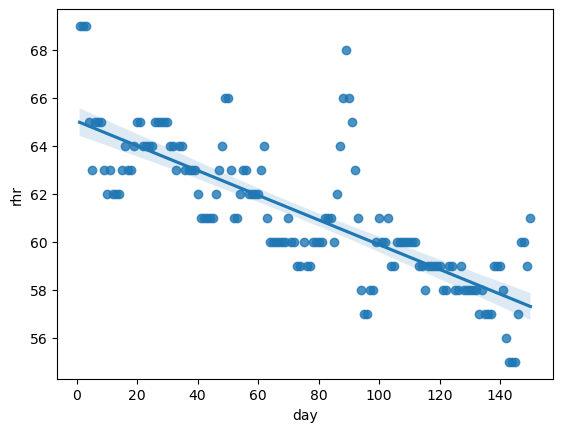

In [23]:
sns.regplot(x="day", y="rhr", data=df)


In [24]:
model = smf.ols(formula='rhr ~ day', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    rhr   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     236.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.59e-32
Time:                        08:46:23   Log-Likelihood:                -297.91
No. Observations:                 150   AIC:                             599.8
Df Residuals:                     148   BIC:                             605.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.0363      0.291    223.247      0.0

In [25]:
F_table = stats.f.ppf(q=1-.05, dfn=1, dfd=df.shape[0]-2)
F_table

3.905060109766206

## F-statistic > f_table => our model is statistically significant.¶

# In the context of linear regression, the F-statistic is often used to test the overall significance of the model. The F-statistic is calculated as the ratio of the explained variance to the unexplained variance. The null hypothesis typically states that all the coefficients in the model (except the intercept) are equal to zero, implying that the independent variables do not have a significant effect on the dependent variable.

# The critical value from the F-distribution table (referred to as f_table in your code) is compared to the calculated F-statistic. If the calculated F-statistic is greater than the critical value, you may reject the null hypothesis, suggesting that your model is statistically significant.

In [26]:
t_table = stats.t.ppf(q = 1 - .05 / 2, df = df.shape[0] - 2)
t_table

1.9761224936033632

# 223.247 > 1.976 => Intercept is statistically significant.¶
# |-15.392| > 1.976 => Day is statistically significant.
# R-squared = 0.615¶

In [27]:
df['Predicted rhr'] = result.params['day'] * df['day'] + result.params['Intercept']
df.head(5)

,distance,rhr,zone mins,day,Predicted rhr
0,4.69,69,0,1,64.984812
1,3.26,69,7,2,64.933294
2,9.05,69,59,3,64.881775
3,7.88,65,80,4,64.830256
4,10.00,63,67,5,64.778737


In [28]:
print('Approximation error =', np.round((100 * mean_absolute_percentage_error(df['rhr'], df['Predicted rhr'])), 2), '%')

Approximation error = 2.05 %


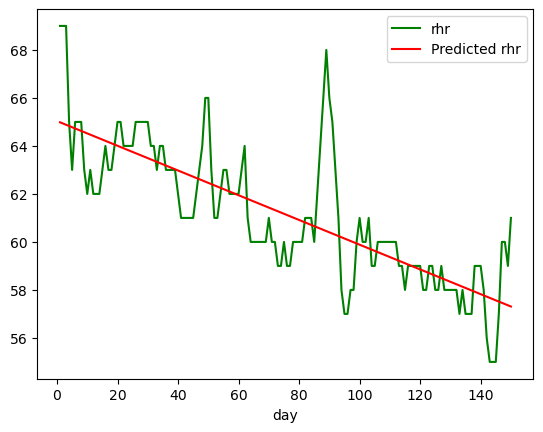

In [29]:
ax = plt.gca()
df.plot(kind='line', x='day', y='rhr', color='green', ax = ax)
df.plot(kind='line', x='day', y='Predicted rhr', color='red', ax=ax)
plt.show()

In [30]:
# Lowest resting heart rate
min_rhr = df['rhr'].min()
min_rhr

55

In [31]:
# Day on which lowest resting heart rate will be reached
day_min_rhr = round((min_rhr - result.params['Intercept']) / result.params['day'])
day_min_rhr

195

In [32]:
print(f'After {day_min_rhr - 150} days a new personal best can be achieved.')


After 45 days a new personal best can be achieved.
